<h3>ML4DS Lab: week 1: Simple linear regression lab</h3>

#### Aims 

* Do a simple linear regression on the Olympic 100~m data in Python
* Practise numpy, matplotlib, and sklearn


#### Tasks 
* Download the data (‘olympic100m.txt’) from the Moodle page
* Plot Olympic year against winning time
* Plot the loss function in 1D and 2D
* Fit a model with sklearn functions 
* Fit a model with using provided expressions to compute $w_0$ and $w_1$. 
* Create a new plot that includes the data and the function defined by $w_0$ and $w_1$
* Make a prediction at 2012

#### Task 1: Download and import the olympic data

Reference to `loadtxt` https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

In [1]:
import numpy as np 

data = np.loadtxt('olympic100m.txt', delimiter = ',')
print(data)

[[1896.     12.  ]
 [1900.     11.  ]
 [1904.     11.  ]
 [1906.     11.2 ]
 [1908.     10.8 ]
 [1912.     10.8 ]
 [1920.     10.8 ]
 [1924.     10.6 ]
 [1928.     10.8 ]
 [1932.     10.3 ]
 [1936.     10.3 ]
 [1948.     10.3 ]
 [1952.     10.4 ]
 [1956.     10.5 ]
 [1960.     10.2 ]
 [1964.     10.  ]
 [1968.      9.95]
 [1972.     10.14]
 [1976.     10.06]
 [1980.     10.25]
 [1984.      9.99]
 [1988.      9.92]
 [1992.      9.96]
 [1996.      9.84]
 [2000.      9.87]
 [2004.      9.85]
 [2008.      9.69]]


#### Task 2: Plot the data
Reference to `scatter`: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

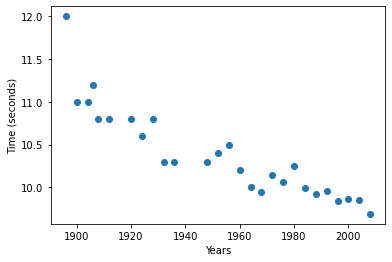

In [2]:
%matplotlib inline
import pylab as plt

x = data[:, 0]
t = data[:, 1]

plt.scatter(x, t)  # Draw a scatter plot.
plt.xlabel('Years')
plt.ylabel('Time (seconds)')
plt.show()

#### Task 3. Fit a straightline using `LinearRegression` in `sklean`. Plot the model with the data and prediction at 2012.
Reference to `LinearRegression`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [3]:
from sklearn.linear_model import LinearRegression

x = np.reshape(x, (x.shape[0], 1))  # Or: x[:, None].
t = np.reshape(t, (t.shape[0], 1))  # Or: t[:, None].

reg = LinearRegression().fit(x, t)
print('w0:', reg.intercept_)
print('w1:', reg.coef_)

w0: [36.4164559]
w1: [[-0.01333089]]


Generate new x to plot the fitted line. Note better not to use the original x! Plot the fitted model. Plot the prediction at 2012. Draw a scatter plot.

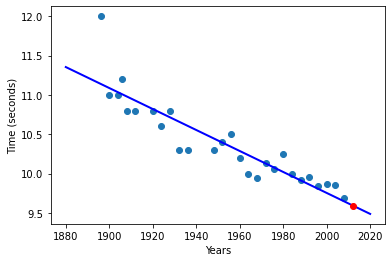

In [4]:
x_test = np.linspace(1880, 2020, 100)
plt.plot(x_test, reg.predict(np.reshape(x_test, (x_test.shape[0], 1))), 'b-', linewidth = 2)
plt.plot(2012, reg.predict(np.array([[2012]])), 'ro')
plt.scatter(x, t)
plt.xlabel('Years')
plt.ylabel('Time (seconds)')
plt.show()

#### Task 5: Fit the model with the Least Square solution. Plot the model with the data and prediction at 2012.

Let's fit a model with an analytical solution to the problem of finding the parameters with the minimum average loss. 

Recall that the average loss is $$  L(w_0, w_1) = \frac{1}{N}\sum_{n=1}^N (t_n - w_0 - w_1x_n)^2 $$
$L$ is a function of $w_0$ and $w_1$. All $x_n$ and $t_n$ are given.  

The procedure to find the analytical expression of the optimal parameters is the following:

- Solving $$\frac{\partial L(w_0, w_1)}{\partial w_0} = 0, \quad \frac{\partial L(w_0, w_1)}{\partial w_1} = 0 $$ 
- the average loss is minimised:
$$ w_1 = \frac{\bar{x}\bar{t} - \bar{xt}}{\bar{x}\bar{x} - \bar{x^2}} $$
and
$$ w_0 = \bar{t} - w_1\bar{x} $$
where $\bar{z} = \frac{1}{N}\sum_{n=1}^N z_n$.

You are encouraged to derive these yourself

In [5]:
xbar = np.mean(x)
tbar = np.mean(t)
xxbar = np.mean(x * x)
xtbar = np.mean(x * t)
print(xbar)
print(tbar)
print(xxbar)
print(xtbar)

1952.3703703703704
10.389629629629631
3812975.5555555555
20268.06814814815


In [6]:
w1 = (xbar * tbar - xtbar) / (xbar * xbar - xxbar)
w0 = tbar - w1 * xbar
print('w0:', w0)
print('w1:', w1)

w0: 36.41645590250286
w1: -0.013330885710960602


Generate new x to plot the fitted line. Note better not to use the original x! Plot the fitted model. Plot the fitted data. Draw a scatter plot.

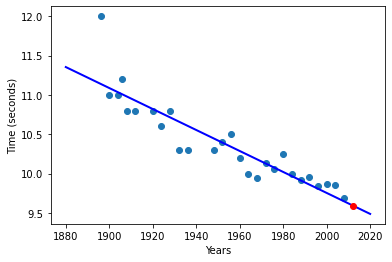

In [7]:
plt.plot(x_test, w0 + w1 * x_test, 'b-', linewidth = 2)  # "x_test" in Task 3.
plt.plot(2012, w0 + w1 * 2012, 'ro')
plt.scatter(x, t)
plt.xlabel('Years')
plt.ylabel('Time (seconds)')
plt.show()